In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os


In [3]:
df = pd.read_csv("heart.csv")


print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape: (1025, 14)

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Dtypes:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
try:
    from ace_tools import display_dataframe_to_user
    display_dataframe_to_user("heart.csv", df.head(6))
except Exception:
    print("\nSample data:\n", df.head(6))


Sample data:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  


In [5]:
X = df.drop(columns=["target"])
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (820, 13), Test size: (205, 13)



Decision Tree (max_depth=3) Test Accuracy: 0.8537


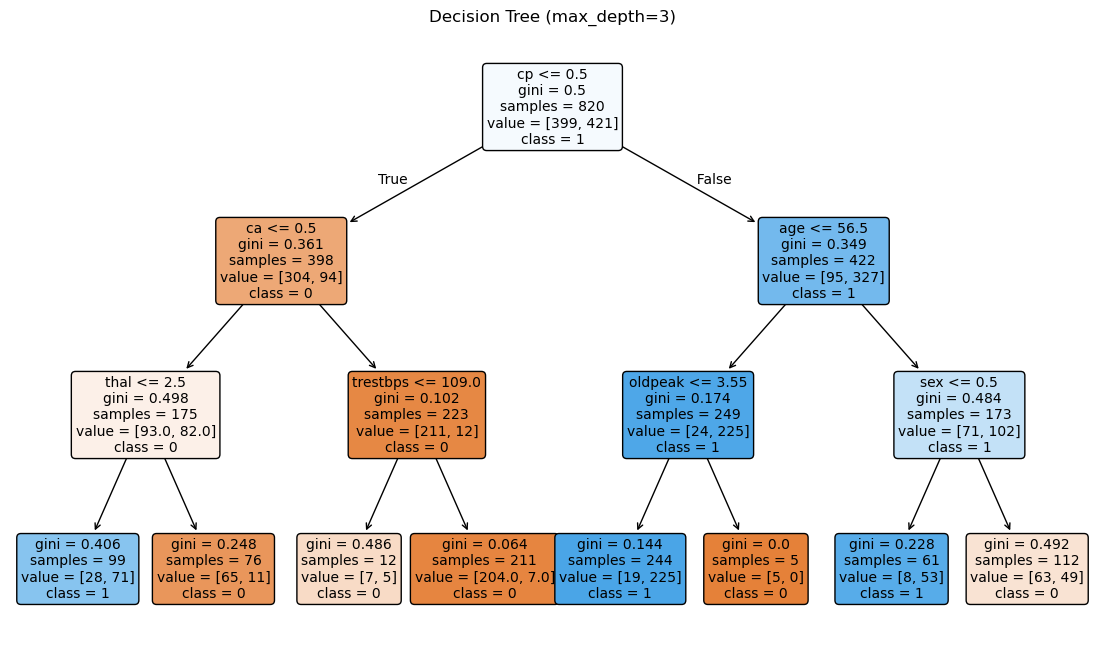

In [6]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3) 
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree (max_depth=3) Test Accuracy: {acc_dt:.4f}")

plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=X.columns, class_names=["0","1"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (max_depth=3)")
plt.show()

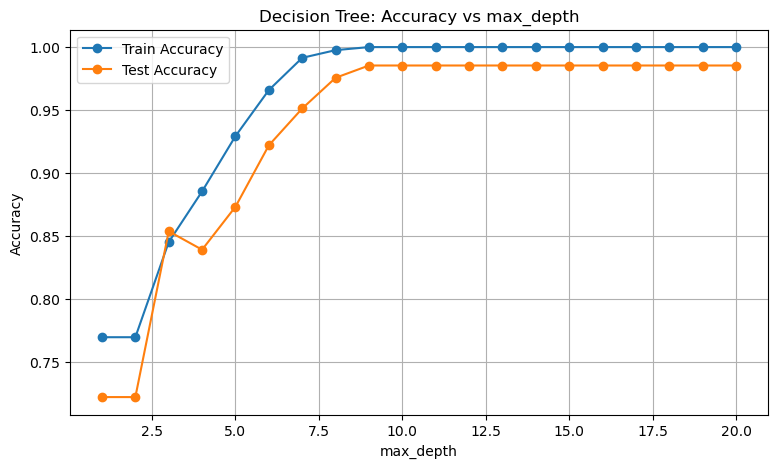


Best test accuracy 0.9854 at max_depth = 9


In [7]:
depths = list(range(1, 21))
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))


plt.figure(figsize=(9,5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Accuracy vs max_depth")
plt.legend()
plt.grid(True)
plt.show()


best_test_acc = max(test_scores)
best_depth = depths[test_scores.index(best_test_acc)]
print(f"\nBest test accuracy {best_test_acc:.4f} at max_depth = {best_depth}")



Random Forest (200 trees) Test Accuracy: 1.0000


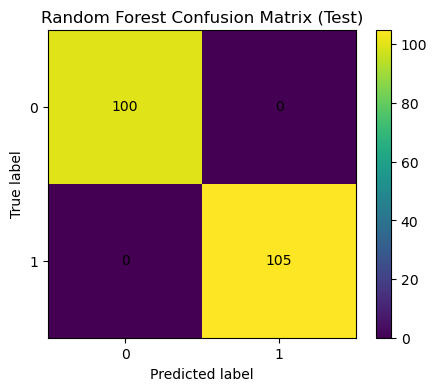


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       100
           1       0.84      0.89      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [8]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest (200 trees) Test Accuracy: {acc_rf:.4f}")


cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(5,4))
plt.imshow(cm_rf, interpolation='nearest')
plt.title("Random Forest Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, cm_rf[i,j], ha='center', va='center')
plt.show()


print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))



Top features (Decision Tree):
 cp          0.523027
ca          0.148423
thal        0.123968
age         0.088571
sex         0.064657
oldpeak     0.036660
trestbps    0.014693
chol        0.000000
fbs         0.000000
restecg     0.000000
dtype: float64

Top features (Random Forest):
 cp          0.144796
thalach     0.118097
ca          0.110965
oldpeak     0.105590
thal        0.101825
age         0.091826
chol        0.076579
exang       0.074189
trestbps    0.071178
slope       0.045234
dtype: float64


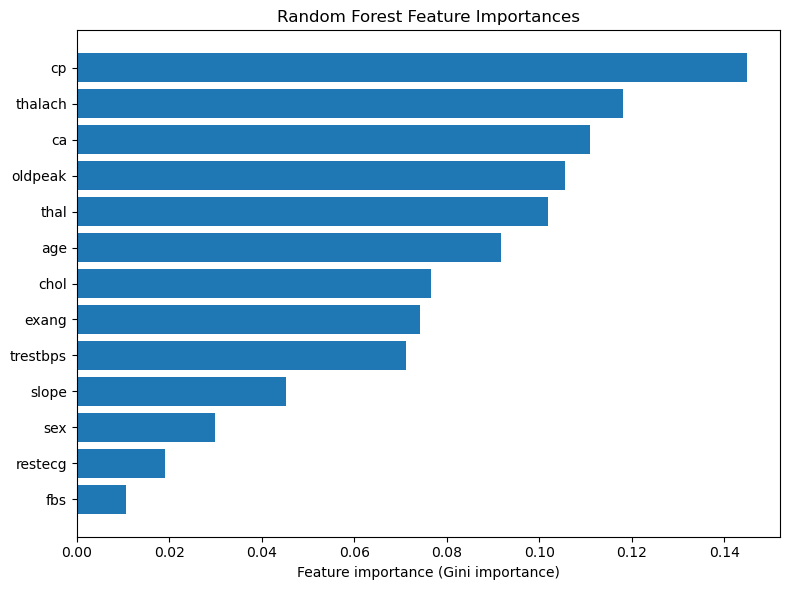

In [9]:
feat_imp_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nTop features (Decision Tree):\n", feat_imp_dt.head(10))
print("\nTop features (Random Forest):\n", feat_imp_rf.head(10))


plt.figure(figsize=(8,6))
plt.barh(feat_imp_rf.index[::-1], feat_imp_rf.values[::-1])
plt.xlabel("Feature importance (Gini importance)")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [10]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=best_depth, random_state=42), X, y, cv=skf, scoring='accuracy')
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), X, y, cv=skf, scoring='accuracy')

print(f"\nDecision Tree CV accuracies (5-fold): {dt_cv_scores}\nMean: {dt_cv_scores.mean():.4f}  Std: {dt_cv_scores.std():.4f}")
print(f"\nRandom Forest CV accuracies (5-fold): {rf_cv_scores}\nMean: {rf_cv_scores.mean():.4f}  Std: {rf_cv_scores.std():.4f}")



Decision Tree CV accuracies (5-fold): [1.         1.         1.         0.98536585 1.        ]
Mean: 0.9971  Std: 0.0059

Random Forest CV accuracies (5-fold): [1.        1.        1.        0.9804878 1.       ]
Mean: 0.9961  Std: 0.0078


In [14]:

summary = pd.DataFrame({
    "model": ["Decision Tree (max_depth="+str(best_depth)+")", "Random Forest (200 trees)"],
    "test_accuracy": [best_test_acc, acc_rf],
    "cv_mean_accuracy": [dt_cv_scores.mean(), rf_cv_scores.mean()],
    "cv_std": [dt_cv_scores.std(), rf_cv_scores.std()]
})

out_path = "heart.csv"
summary.to_csv(out_path, index=False)
print(f"\nSaved model summary to: {out_path}")


try:
    display_dataframe_to_user("Model performance summary", summary)
except Exception:
    print("\nModel summary:\n", summary.to_string(index=False))


print("\nTask 5 completed: Blocks executed include dataset check, preprocessing split, decision tree training & visualization, overfitting analysis, random forest training, feature importance, cross-validation, and summary saved.")



Saved model summary to: heart.csv

Model summary:
                       model  test_accuracy  cv_mean_accuracy   cv_std
Decision Tree (max_depth=9)       0.985366          0.997073 0.005854
  Random Forest (200 trees)       1.000000          0.996098 0.007805

Task 5 completed: Blocks executed include dataset check, preprocessing split, decision tree training & visualization, overfitting analysis, random forest training, feature importance, cross-validation, and summary saved.
